# Disentangled Variational Autoencoder Demo
This demo is based on the JointVAE framework and implementation by Emilien Dupont (2018) and showcases how the model found data-generative factors of various data inlcuding hand-written digits and fashion. It enables the user to get a touch and feel for how targeted data generation becomes possible with disentangled Variation Autoencoders (cf. Higgins et al. 2016).

In [1]:
# Imports
from visualization.visualizer import Visualizer
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

/Users/jaabertr/Desktop/Uni/WF Artificial Intelligence/Abgabe Themenbereich 3/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Hand-written digit generation
VAE trained on MNIST, used for hand-written digit generation.

In [2]:
# Definition
path_mnist = './trained_models/mnist/'
viz_mnist = Visualizer(path_mnist)

In [3]:
viz_mnist.model

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

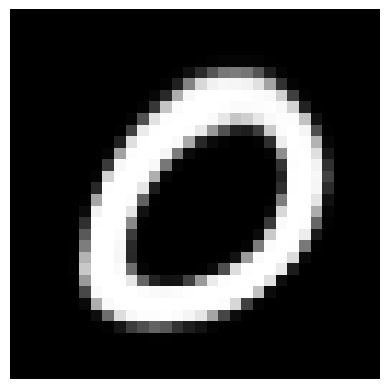

In [4]:
# Generate
continuous = [0.0000,  0.0000,  0.0000,  0.0000,  0.0000,   0.0000,  0.0000,    0.0000,  0.0000,  0.0000]
#             width    style1   tilt     Nothing  Nothing   Nothing  thickness  Nothing  style2   Nothing
# style 1: High values -> horizontal line further towards right, low values -> lean number
# style 2: Written more or less italic.
discrete = [0, 0, 0, 0, 0, 0, 0, 0, 0, 3] # 3 for a good sharpness, fixed instead of ppf
number_mapping = [2, 8, 9, 1, 6, 3, 5, 4, 7, 0]
img = viz_mnist.visualize(discrete_latent_parameters=discrete, continous_latent_parameters=continuous)

# Visualize
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
# Make the notebook interactive

# Define sliders for each parameter
slider1 = widgets.IntSlider(value=4, min=0, max=9, step=1, description='Number type')
slider2 = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='Width')
slider3 = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='Style 1')
slider4 = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='Style 2')
slider5 = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='Tilt')
slider6 = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='Thickness')

# Create output areas for sliders and image
output_sliders = widgets.Output(layout={'background-color': 'black', 'padding': '10px', 'width': '50%'})
output_image = widgets.Output(layout={'background-color': 'black', 'width': '50%'})

# Display sliders in one output area
with output_sliders:
    display(widgets.VBox([slider1, slider2, slider3, slider4, slider5, slider6]))

# Display image in another output area
with output_image:
    pass

# Define function to update output when sliders change
def update_output(change):
    "On change of input, we want to run this."

    output_image.clear_output(wait=True)  # Clear the image output area

    continuous = [slider2.value,  slider3.value,  slider5.value,  0.0000,  0.0000,   0.0000,  slider6.value,    0.0000,  slider4.value,  0.0000]
    #             width           style1          tilt            Nothing  Nothing   Nothing  thickness         Nothing  style2          Nothing
    # style 1: High values -> horizontal line further towards right, low values -> lean number
    # style 2: Written more or less italic.
    # discrete = [0, 0, 0, 0, 0, 0, 0, 0, 0, 3] # 3 for a good sharpness, fixed instead of ppf
    discrete = np.zeros(10, int)
    number_mapping = [2, 8, 9, 1, 6, 3, 5, 4, 7, 0]
    discrete[number_mapping.index(slider1.value)] = 3 # 3 for a good sharpness, fixed instead of ppf
    img = viz_mnist.visualize(discrete_latent_parameters=discrete, continous_latent_parameters=continuous)

    # Visualize
    with output_image:
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()
    

# Attach the update function to each slider
slider1.observe(update_output, names='value')
slider2.observe(update_output, names='value')
slider3.observe(update_output, names='value')
slider4.observe(update_output, names='value')
slider5.observe(update_output, names='value')
slider6.observe(update_output, names='value')

# Display output areas and sliders
display(HTML("<style>.output_wrapper, .output { height:auto !important; max-height: none !important; }</style>"))
display(widgets.HBox([output_sliders, output_image]))

## DSprites Dataset

In [49]:
# Definition
path_mnist = './trained_models/dsprites/'
viz_mnist = Visualizer(path_mnist)
viz_mnist.model

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=6, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=6, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=3, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=9, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(6

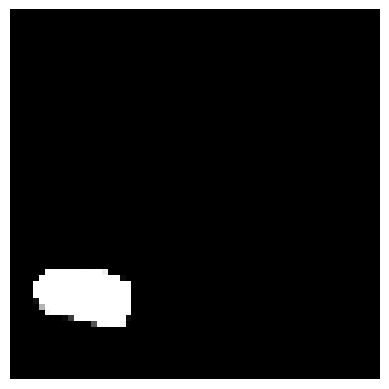

In [174]:
# Generate
continuous = [0.0000, 10.0000, -10.0000, 0.0000, 0.0000,\
            # None    y-axis   x-axis    None    Scale
              -7.0000]
            # Angle

discrete = [0.0000, 0.0000000000000, 0.0000] # 3 for a good sharpness, fixed instead of ppf
          # shape   shape            dark if other than 0
          # Nothing usefull except for the first dimension.

img = viz_mnist.visualize(discrete_latent_parameters=discrete, continous_latent_parameters=continuous)

# Visualize
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [183]:
# Make the notebook interactive

# Define sliders for each parameter
slider1 = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=1., description='Y-Axis')
slider2 = widgets.FloatSlider(value=0.0, min=-10.0, max=10.0, step=1., description='X-Axis')
slider3 = widgets.FloatSlider(value=-2.0, min=-3.0, max=-1.0, step=1., description='Shape')
slider4 = widgets.FloatSlider(value=0.0, min=-4.0, max=3.0, step=1., description='Angle')
slider5 = widgets.IntSlider(value=0, min=0, max=10, step=1, description='Scale 1')
slider6 = widgets.IntSlider(value=0, min=0, max=10, step=1, description='Scale 2')

# Create output areas for sliders and image
output_sliders = widgets.Output(layout={'background-color': 'black', 'padding': '10px', 'width': '50%'})
output_image = widgets.Output(layout={'background-color': 'black', 'width': '50%'})

# Display sliders in one output area
with output_sliders:
    display(widgets.VBox([slider1, slider2, slider3, slider4, slider5, slider6]))

# Display image in another output area
with output_image:
    pass

# Define function to update output when sliders change
def update_output(change):
    "On change of input, we want to run this."

    output_image.clear_output(wait=True)  # Clear the image output area

    continuous = [0, slider1.value, slider2.value, 0, slider3.value, slider4.value]
    discrete = [slider6.value, slider5.value, 0]
    img = viz_mnist.visualize(discrete_latent_parameters=discrete, continous_latent_parameters=continuous)

    # Visualize
    with output_image:
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()
    

# Attach the update function to each slider
slider1.observe(update_output, names='value')
slider2.observe(update_output, names='value')
slider3.observe(update_output, names='value')
slider4.observe(update_output, names='value')
slider5.observe(update_output, names='value')
slider6.observe(update_output, names='value')

# Display output areas and sliders
display(HTML("<style>.output_wrapper, .output { height:auto !important; max-height: none !important; }</style>"))
display(widgets.HBox([output_sliders, output_image]))

#### References
- Dupont, Emilien. "Learning disentangled joint continuous and discrete representations." Advances in neural information processing systems 31 (2018).
- JointVAE implementation: https://github.com/Schlumberger/joint-vae/tree/master, lastest retrieval 02nd Feb 2024
- Higgins, Irina, et al. "Early visual concept learning with unsupervised deep learning." arXiv preprint arXiv:1606.05579 (2016).